***DATA COLLECTION:***

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [59]:
df=pd.read_csv("/kaggle/input/cybercrime/cybercrime_dataset.csv")
df.head()


,STATE/UT,COMPUTER RELATED OFFENCE,CYBER TERRORISM,PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM,OTHER SECTIONS OF IT ACT,STATE-WISETOTAL(A),Unnamed: 6,CYBER STALKING,DATA THEFT,FRAUD,...,STATE-WISETOTAL(B),Unnamed: 16,GAMBLING(ONLINE),LOTTERIES ACT(ONLINE),COPY RIGHT ACT 1957,OTHER SLL CRIMES,STATE-WISETOTAL(C),Unnamed: 22,total crimes 2021,risk
0,Andhra Pradesh,101.0,0.0,57.0,12.0,170.0,NaN,105.0,9.0,952.0,...,1684.0,NaN,0.0,0.0,1.0,9.0,10.0,NaN,1864.0,1.0
1,Arunachal Pradesh,33.0,0.0,9.0,1.0,43.0,NaN,1.0,0.0,2.0,...,4.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,47.0,0.0
2,Assam,1965.0,0.0,1652.0,219.0,3836.0,NaN,31.0,1.0,82.0,...,1004.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,4840.0,1.0
3,Bihar,5.0,0.0,6.0,0.0,11.0,NaN,3.0,0.0,1373.0,...,1401.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,1412.0,0.0
4,Chhattisgarh,23.0,0.0,164.0,18.0,205.0,NaN,9.0,3.0,67.0,...,147.0,NaN,0.0,0.0,1.0,0.0,1.0,NaN,353.0,0.0


In [60]:
df.columns

Index(['STATE/UT', 'COMPUTER RELATED OFFENCE', 'CYBER TERRORISM',
       'PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM',
       'OTHER SECTIONS OF IT ACT', 'STATE-WISETOTAL(A)', 'Unnamed: 6',
       'CYBER STALKING', 'DATA THEFT', 'FRAUD', 'CHEATING', 'FORGERY',
       'Cyber Blackmailing', 'DEFAMATION', 'OTHERS', 'STATE-WISETOTAL(B)',
       'Unnamed: 16', 'GAMBLING(ONLINE)', 'LOTTERIES ACT(ONLINE)',
       'COPY RIGHT ACT 1957', 'OTHER SLL CRIMES', 'STATE-WISETOTAL(C)',
       'Unnamed: 22', 'total crimes 2021', 'risk'],
      dtype='object')

***DATA:***

In [61]:
# Assuming df is your DataFrame
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
# Display the first few rows of the modified DataFrame
print(df.head())


            STATE/UT  COMPUTER RELATED OFFENCE  CYBER TERRORISM  \
0     Andhra Pradesh                     101.0              0.0   
1  Arunachal Pradesh                      33.0              0.0   
2              Assam                    1965.0              0.0   
3              Bihar                       5.0              0.0   
4       Chhattisgarh                      23.0              0.0   

   PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM  \
0                                               57.0                              
1                                                9.0                              
2                                             1652.0                              
3                                                6.0                              
4                                              164.0                              

   OTHER SECTIONS OF IT ACT  STATE-WISETOTAL(A)  CYBER STALKING  DATA THEFT  \
0                  

In [62]:
df.isnull().sum()

STATE/UT                                                                        2
COMPUTER RELATED OFFENCE                                                        2
CYBER TERRORISM                                                                 2
PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM    2
OTHER SECTIONS OF IT ACT                                                        2
STATE-WISETOTAL(A)                                                              2
CYBER STALKING                                                                  2
DATA THEFT                                                                      2
FRAUD                                                                           2
CHEATING                                                                        2
FORGERY                                                                         2
Cyber Blackmailing                                                              2
DEFAMATION      

***EXPLORATORY DATA ANALYSIS:***

In [63]:
summary_statistics = df.describe(include='all')
summary_statistics.head()

,STATE/UT,COMPUTER RELATED OFFENCE,CYBER TERRORISM,PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM,OTHER SECTIONS OF IT ACT,STATE-WISETOTAL(A),CYBER STALKING,DATA THEFT,FRAUD,CHEATING,...,DEFAMATION,OTHERS,STATE-WISETOTAL(B),GAMBLING(ONLINE),LOTTERIES ACT(ONLINE),COPY RIGHT ACT 1957,OTHER SLL CRIMES,STATE-WISETOTAL(C),total crimes 2021,risk
count,36,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.0,36.000000,36.0,36.00,36.000000,36.000000,36.00,36.000000,37.000000,36.00
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,552.916667,0.416667,183.277778,22.972222,759.583333,32.666667,4.722222,389.083333,176.194444,...,1.0,73.194444,701.5,0.75,0.111111,0.666667,2.75,4.277778,1465.361111,0.25


In [64]:
# Calculate the percentage of missing values in each column
missing_data = df.isnull().mean() * 100

# Display columns with missing data and their respective percentage of missing values
missing_data[missing_data > 0]

STATE/UT                                                                        5.263158
COMPUTER RELATED OFFENCE                                                        5.263158
CYBER TERRORISM                                                                 5.263158
PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM    5.263158
OTHER SECTIONS OF IT ACT                                                        5.263158
STATE-WISETOTAL(A)                                                              5.263158
CYBER STALKING                                                                  5.263158
DATA THEFT                                                                      5.263158
FRAUD                                                                           5.263158
CHEATING                                                                        5.263158
FORGERY                                                                         5.263158
Cyber Blackmailing   

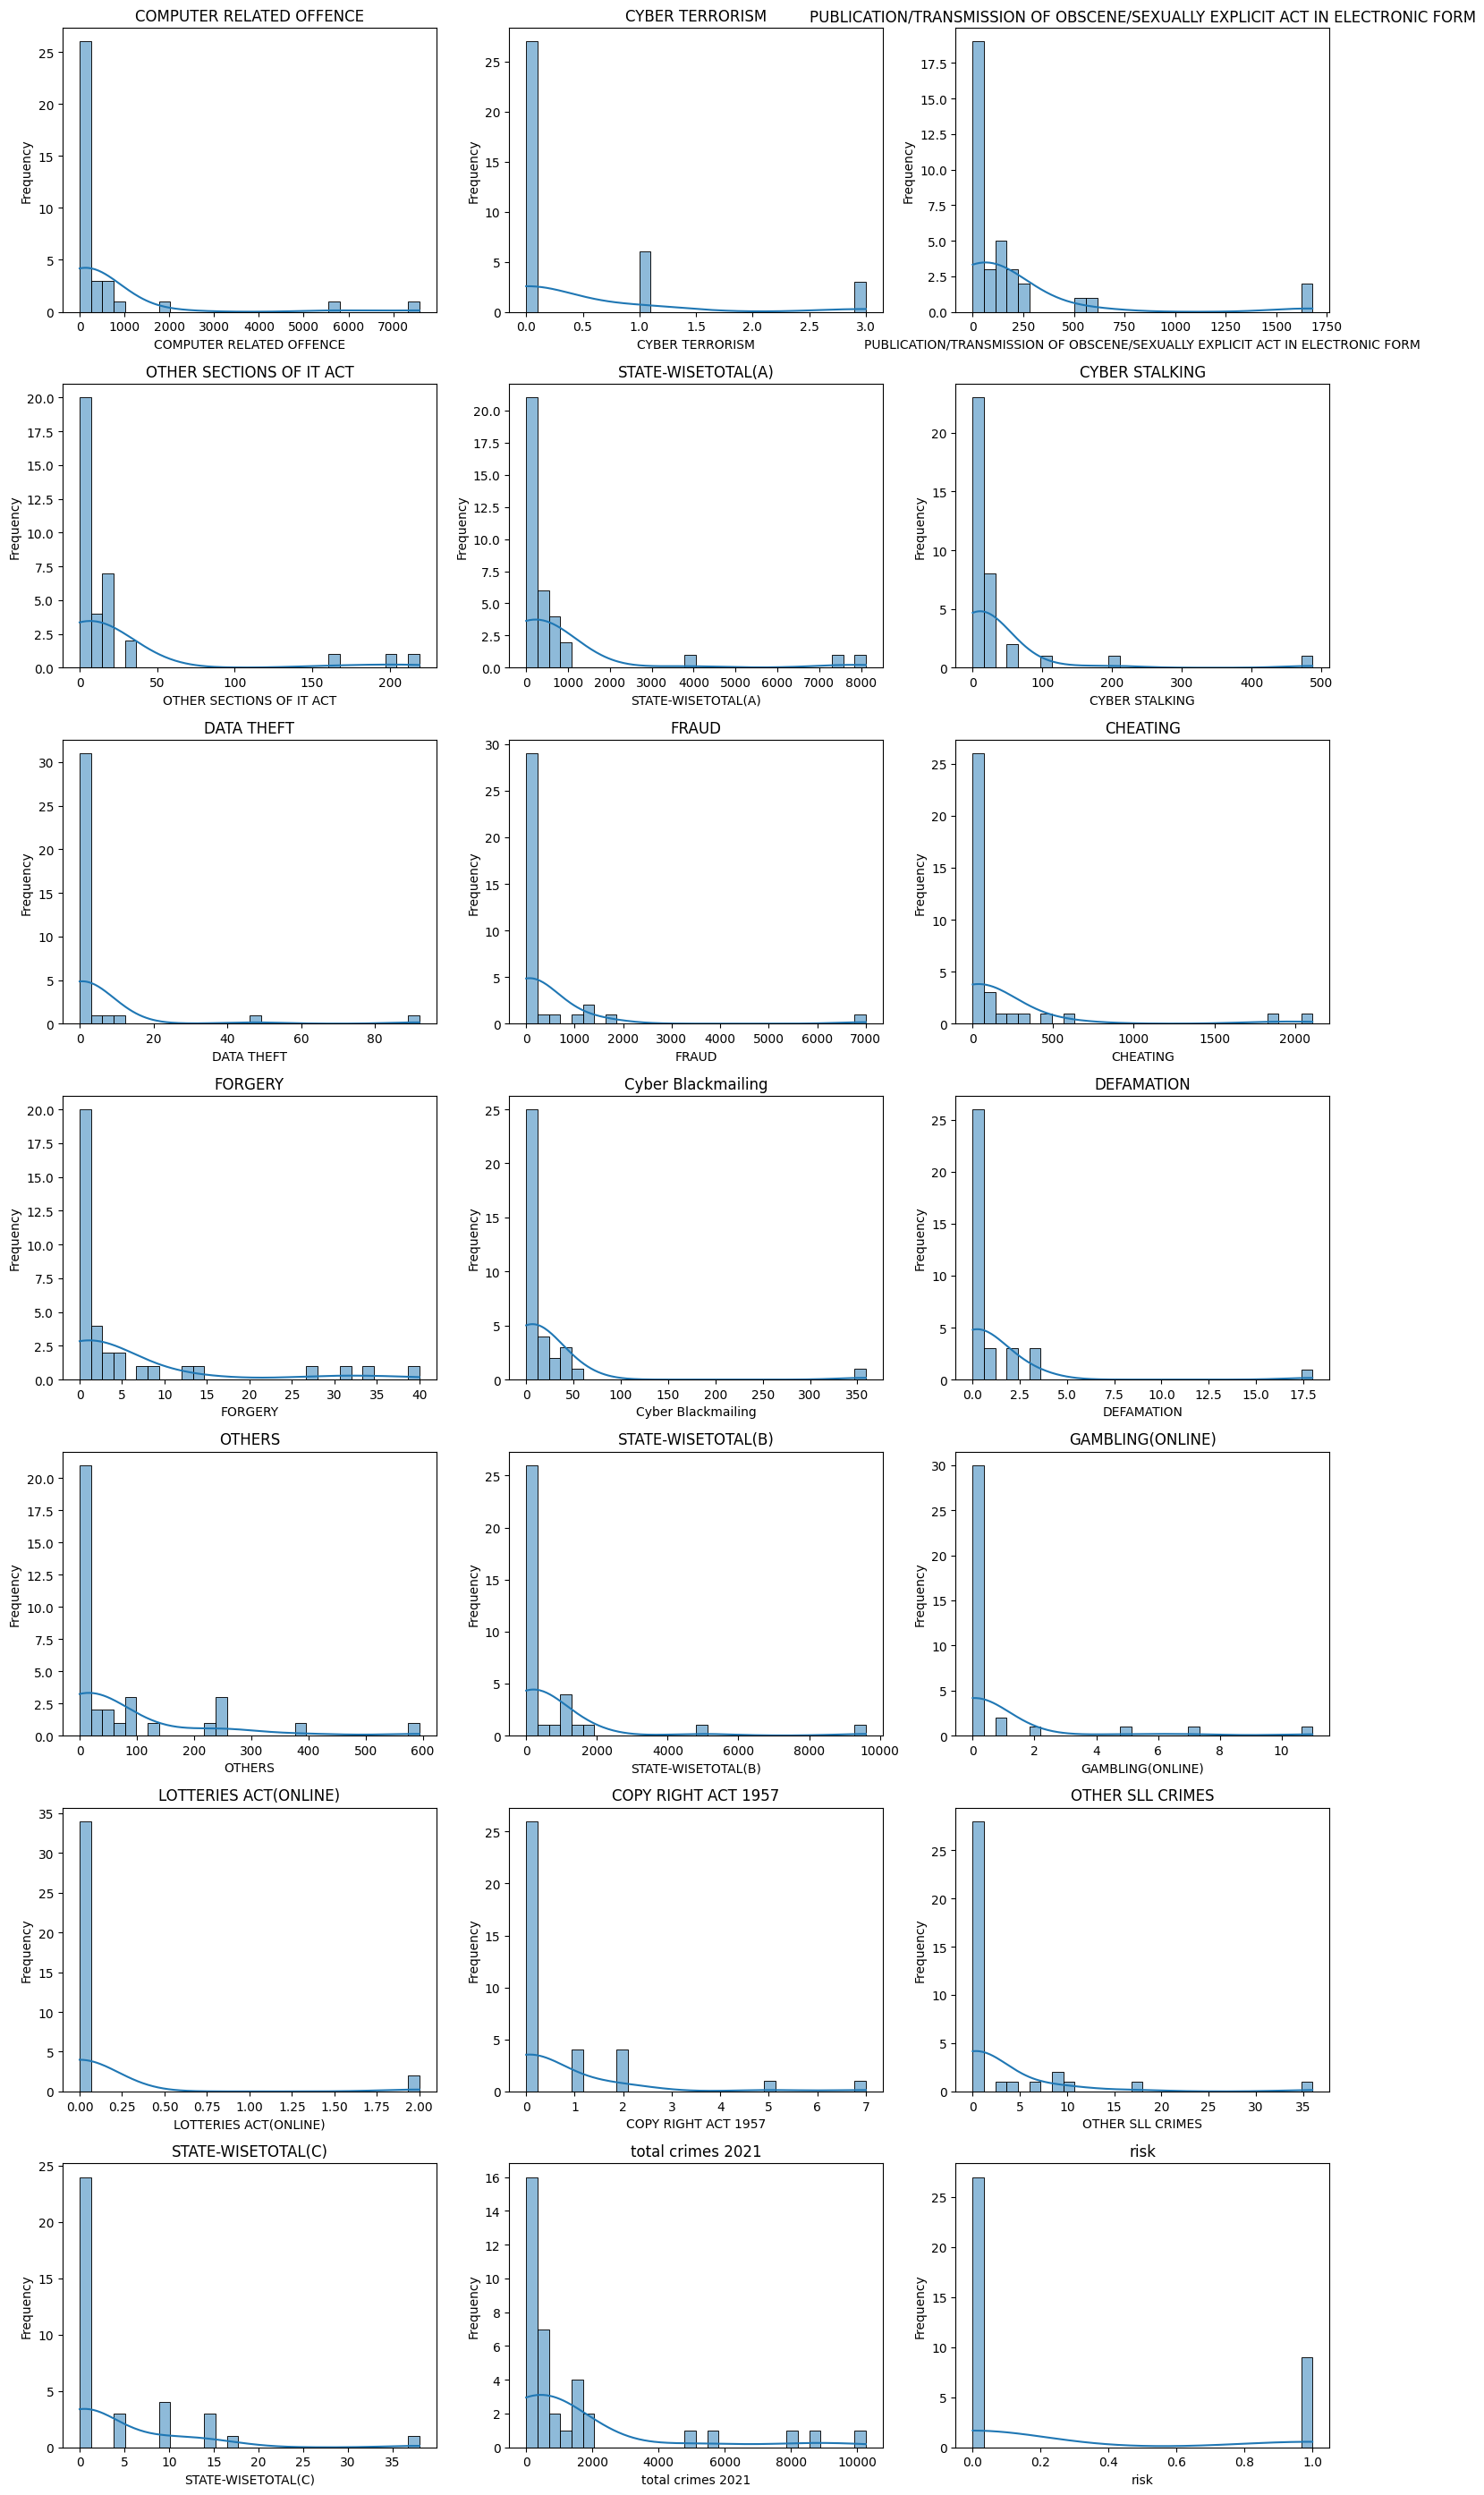

In [65]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
n_cols = 3
n_rows = int(len(numerical_cols) / n_cols) + (len(numerical_cols) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    ax = axes[i//n_cols, i%n_cols]
    sns.histplot(df[col], bins=30, ax=ax, kde=True)
    ax.set_title(col)
    ax.set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

***DATA_PREPROCESSING:***

In [66]:
# Calculate the correlation of each feature with the target variable "risk"
correlation_with_target = cybercrime_df_encoded.corrwith(cybercrime_df_encoded['risk']).sort_values(ascending=False)

# Display the correlation of each feature with "risk"
correlation_with_target


risk                                                                            1.000000
total crimes 2021                                                               0.770647
FORGERY                                                                         0.657492
OTHERS                                                                          0.647227
CHEATING                                                                        0.590157
STATE-WISETOTAL(B)                                                              0.564518
PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM    0.563499
STATE-WISETOTAL(A)                                                              0.551613
OTHER SECTIONS OF IT ACT                                                        0.551214
STATE-WISETOTAL(C)                                                              0.514933
COMPUTER RELATED OFFENCE                                                        0.500428
CYBER STALKING       

In [67]:
from sklearn.impute import SimpleImputer

# 2. Handle Missing Values

# Separate the 'STATE/UT' column
state_ut_col = df[['STATE/UT']]
df = df.drop(['STATE/UT'], axis=1)

# Impute missing numerical values with median
numerical_imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(numerical_imputer.fit_transform(df), columns=df.columns)

# Impute missing categorical values with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
state_ut_col = pd.DataFrame(categorical_imputer.fit_transform(state_ut_col), columns=state_ut_col.columns)

# Combine the 'STATE/UT' column back with the main DataFrame
df = pd.concat([state_ut_col, df], axis=1)

# Check if there are any missing values left
missing_values_after_imputation = df.isnull().sum().sum()
df.describe()


,COMPUTER RELATED OFFENCE,CYBER TERRORISM,PUBLICATION/TRANSMISSION OF OBSCENE/SEXUALLY EXPLICIT ACT IN ELECTRONIC FORM,OTHER SECTIONS OF IT ACT,STATE-WISETOTAL(A),CYBER STALKING,DATA THEFT,FRAUD,CHEATING,FORGERY,...,DEFAMATION,OTHERS,STATE-WISETOTAL(B),GAMBLING(ONLINE),LOTTERIES ACT(ONLINE),COPY RIGHT ACT 1957,OTHER SLL CRIMES,STATE-WISETOTAL(C),total crimes 2021,risk
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,527.605263,0.394737,175.394737,21.868421,727.236842,31.342105,4.473684,369.236842,167.578947,5.236842,...,0.947368,69.868421,667.710526,0.710526,0.105263,0.631579,2.605263,4.052632,1440.220029,0.236842
std,1517.435560,0.855490,379.552033,52.132975,1816.964925,84.247713,16.541082,1180.028686,451.982742,10.311852,...,2.995017,128.602924,1735.816182,2.216741,0.452589,1.459749,6.712391,7.619134,2573.518815,0.430851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,0.000000,4.500000,0.000000,10.250000,0.250000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,7.250000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
50%,72.000000,0.000000,33.500000,2.000000,145.000000,7.500000,0.000000,12.000000,12.500000,0.500000,...,0.000000,10.000000,59.500000,0.000000,0.000000,0.000000,0.000000,0.000000,510.000000,0.000000
75%,254.750000,0.000000,160.250000,17.500000,504.500000,20.500000,1.000000,87.250000,70.000000,3.750000,...,0.750000,79.500000,406.750000,0.000000,0.000000,0.750000,1.000000,5.000000,1452.020833,0.000000
max,7581.000000,3.000000,1679.000000,219.000000,8115.000000,487.000000,92.000000,7003.000000,2109.000000,40.000000,...,18.000000,594.000000,9605.000000,11.000000,2.000000,7.000000,36.000000,38.000000,10263.000000,1.000000


***ML MODEL:***

In [68]:
df = pd.get_dummies(df, columns=['STATE/UT'], drop_first=True)

# Define the features X and the target y
X = df.drop('risk', axis=1)
y = df['risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a LogisticRegression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Model Accuracy: 0.875
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define the features X and the target y
X = df.drop('risk', axis=1)
y = df['risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize an SVM model
model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))


Model Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Define the features X and the target y
X = df.drop('risk', axis=1)
y = df['risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



***MODEL_COMPARISON***

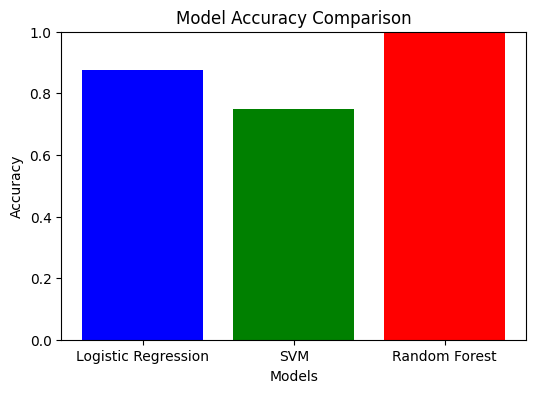

In [74]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
models = ['Logistic Regression',  'SVM', 'Random Forest']
accuracies = [0.875, 0.75, 1]  # Replace these values with the actual accuracies calculated

# Create a bar chart to compare the accuracies of the models
plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
